<a href="https://colab.research.google.com/github/AbdulRauf96/Python-Pratice/blob/main/ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from google.colab import files, drive 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stock = pd.read_csv(open('/content/drive/My Drive/Colab Notebooks/GOOG.csv'))
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-23,2025.010010,2082.010010,2002.020020,2070.860107,2070.860107,1667400
1,2021-02-24,2041.829956,2100.780029,2038.130005,2095.169922,2095.169922,1248300
2,2021-02-25,2067.449951,2094.879883,2021.290039,2031.359985,2031.359985,1828400
3,2021-02-26,2050.520020,2071.010010,2016.060059,2036.859985,2036.859985,2083500
4,2021-03-01,2056.520020,2086.520020,2046.099976,2081.510010,2081.510010,1404500


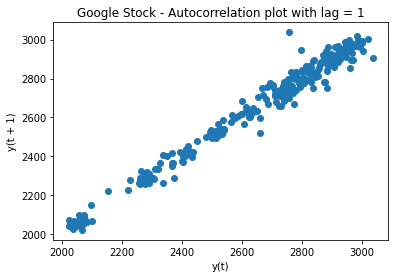

In [ ]:
plt.figure()
lag_plot(stock['Open'], lag=1)
plt.title('Google Stock - Autocorrelation plot with lag = 1')
plt.show()

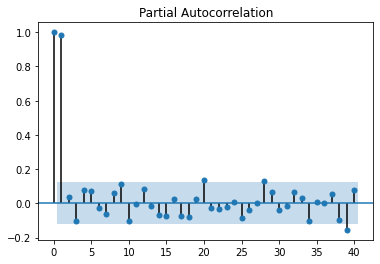

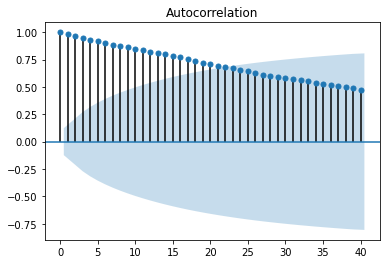

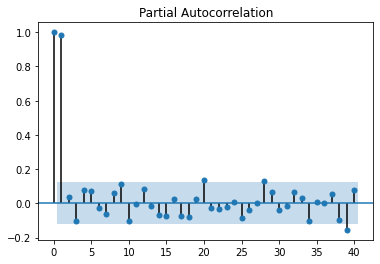

In [ ]:
plot_acf(Stock['Close'],lags=40)
plot_pacf(Stock['Close'],lags=40)

In [ ]:
import plotly.express as px

fig = px.line(stock, x='Date', y="Close")
fig.show()

# plt.plot(stock["Date"], stock["Close"])
# plt.title("TESLA stock price over time")
# plt.xlabel("time")
# plt.ylabel("price")
# plt.show()

In [ ]:
train_data, test_data = stock[0:int(len(stock)*0.7)], stock[int(len(stock)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(np.sqrt(MSE_error)))

Testing Mean Squared Error is 53.019698623277286


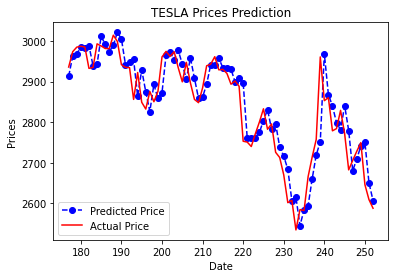

In [ ]:
test_set_range = stock[int(len(stock)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), stock.Date[881:1259:50])
plt.legend()
plt.show()